In [2]:
import urllib.request, json 

# 5min BTC/USDT chart form Poloniex since 2017-01-01T00:00:00+00:00 till 2018-10-14T20:00:00+00:00
with urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1483228800&end=1539547200&period=300") as url:
    data = json.loads(url.read().decode())

print(data[0])

{'close': 964.00000127, 'date': 1483228800, 'weightedAverage': 964.64262399, 'open': 965.00000055, 'high': 965.00000066, 'low': 964.00000002, 'volume': 5398.83711674, 'quoteVolume': 5.59672254}


In [3]:
import csv
import numpy as np
import pandas as pd


# df = pd.DataFrame(data=data, columns=['date', 'weightedAverage', 'low', 'high', 'open', 'close', 'quoteVolume'])

# df = df.fillna(method='ffill')
# df.to_csv("poloniex_usdt_btc_20170101_weightedAverage_300.csv", sep=";", index=False)

# Data already downloaded
df = pd.read_csv("poloniex_usdt_btc_20170101_weightedAverage_300.csv", sep=";", index_col=None)

df.head()

,date,weightedAverage,low,high,open,close,quoteVolume
0,1483228800,964.642624,964.000000,965.000001,965.000001,964.000001,5.596723
1,1483229100,965.858035,964.000002,966.150000,966.150000,964.000002,0.087282
2,1483229400,963.946565,962.028165,966.149988,964.050000,964.000000,2.737368
3,1483229700,962.024978,961.700000,964.000000,962.028165,962.200001,3.550087
4,1483230000,963.568648,962.769304,964.677377,964.000011,962.849999,0.083323


In [4]:
# df = df[-60000:]
print(df.shape)

(187729, 7)


In [45]:
# Turn dataframe into a numpy floating point array
df_values = df.values
timestamps = df_values[:, 0]
dataset = df_values[:, 1].astype("float")

In [61]:
window_size = 50

samples_num = dataset.shape[0]

print(dataset.shape)

#print(dataset[:50])

X_train = np.reshape(dataset[:int(samples_num*0.7)], (-1, timestep))/np.max(dataset)

#print(d[:5,:])

print(X_train.shape)
                             
X_test = np.reshape(dataset[int(samples_num*0.7):], (-1, timestep))/np.max(dataset)

print(X_test.shape)

(55000,)
(770, 50)
(330, 50)


In [62]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 30

input_data = Input(shape=(X_train.shape[1],))

# "encoded": a bemenet tömörített változata
encoded = Dense(encoding_dim, activation='relu')(input_data)

# "decoded": a bemenet veszteséges visszaállítása
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

# bemenet és visszaállított változata
autoencoder = Model(input_data, decoded)

# "encoder" modell: bemenetből tömörített
encoder = Model(input_data, encoded) 

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

# "decoder" modell: visszaállítás 
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=1,
                shuffle=False,
                validation_data=(X_test, X_test))


encoded_data = encoder.predict(X_train)
decoded_data = decoder.predict(encoded_data)



Train on 770 samples, validate on 330 samples
Epoch 1/50
770/770 [==============================] - 2s 2ms/step - loss: 0.0080 - val_loss: 0.0048
Epoch 2/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 3/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0032 - val_loss: 0.0052
Epoch 4/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 0.0051
Epoch 5/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 6/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 7/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 0.0043
Epoch 8/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 9/50
770/770 [==============================] - 1s 1ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 10/50
770/770 [==============================] -

In [63]:
print(encoded_data.shape)
print(decoded_data.shape)

(770, 30)
(770, 50)


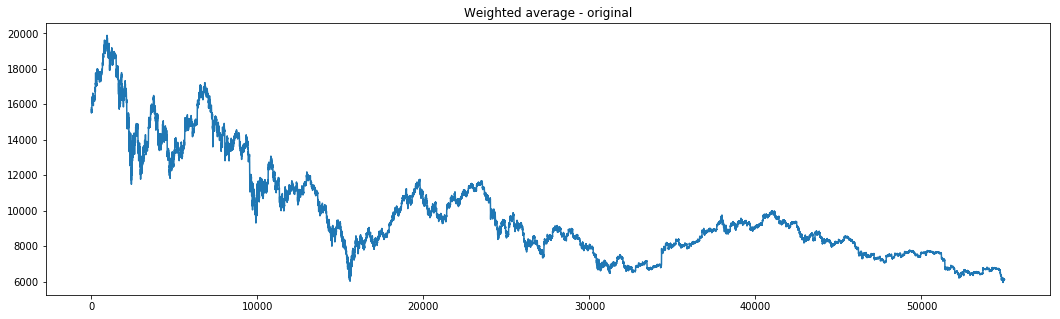

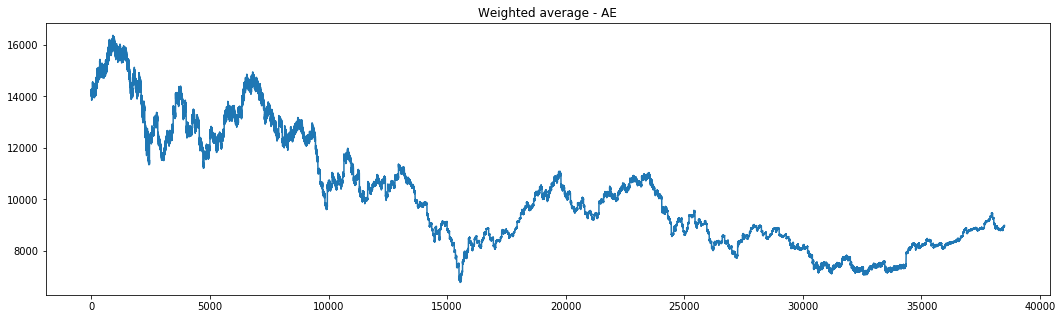

In [64]:
d2 = np.reshape(decoded_data, -1) * np.max(dataset)
d2.shape

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18, 5))
plt.title('Weighted average - original')
plt.plot(dataset)
plt.show()

plt.figure(figsize=(18, 5))
plt.title('Weighted average - AE')
plt.plot(d2)
plt.show()

In [34]:
# Training model
model.fit(train_X[::1], train_y[::1],
          batch_size=512,
          epochs=2500,
          validation_data=(valid_X[::1],valid_y[::1])
         )

Train on 124500 samples, validate on 13500 samples
Epoch 1/2500
124500/124500 [==============================] - 269s 2ms/step - loss: 0.0244 - val_loss: 0.0054

Epoch 00001: val_loss improved from inf to 0.00541, saving model to weights.hdf5
Epoch 2/2500
  7168/124500 [>.............................] - ETA: 4:30 - loss: 0.0055

KeyboardInterrupt: 

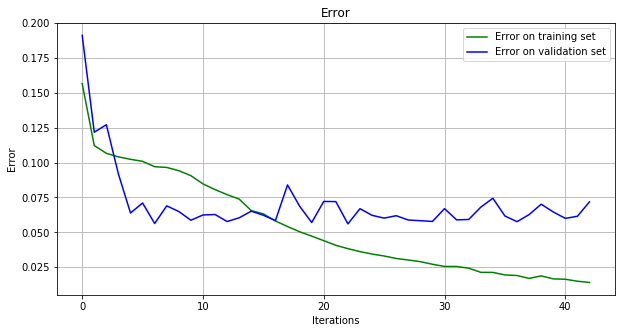

In [295]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.title('Error')
plt.plot(np.arange(history.epoch), history.losses, color ='g', label='Error on training set') 
plt.plot(np.arange(history.epoch), history.valid_losses, color ='b', label='Error on validation set')
plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid(True)
plt.show()